<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Naruto_Characters_Classification/blob/main/Naruto_Characters_Classification_Pilot_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naruto Characters Classification Pilot Project

**This is a test project to learn and gather all the pieces/ skills required to complete the full project.**

*The **Naruto Characters Classification Project** is a multi class classification project.  
The total number of classes for the project are not yet known.*  

This pilot project is aimed to check the viability of the complete project and to acquire the skills required for the completion of the full project.  

This Pilot Project is being made using **3 classes**:
1.   Naruto_Uzumaki
2.   Sakura_Haruno
3.   Sasuke_Uchiha



## Concerns
#### Concern 1 : There are multiple similar images in each class these need to be filtered out in order to avoid a bias.

##### Solution : Done for Naruto, Sakura and Sasuke images.  
  
  
#### Concern 2 : There is a need to manually edit the images in order to remove the labels or unrelated information on the image.

##### Solution : Done for Naruto, Sakura and Sasuke images.  
    
#### Concern 3 : There is a need to create labels of the images and save them as a separate labels file.  
##### Solution : Task 6
#### Concern 4 : There is a need to convert the 4 channel PNG images to 3 channel images [RBGA to RBG]. 
##### Solution : Task 3  
**This is not necessary if making own CNN because CNN can take any size input but if using transfer learning 3 channels might be required since most of the premade models only accept a 3 channel input**
#### Concern 5 : There is a need to standardize the shape (i.e. the image width and height) of all the images.



## Important Notes
#### Note 1 : There are two ways to load images for the project


1. Create 2 folders one for test and another for train data and inside each of them have separate folders for images belonging to each class. This method uses ImageDataGenerator.flow_from_directory() to perform on the spot data augmentation and you don't need to provide a separate train and test label file.
2.   Create a single folder and put all the data in it. Make a separate file with image names and labels. Now read the data using the labels file and afterwards create a train_test_split. In this method we will use ImageDataGenerator.flow() to perform on the spot data augmentation.



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

## Task 1 : Reading an image

In [ ]:
img_1 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Naruto_Uzumaki/Naruto_Uzumaki (1).png')

In [ ]:
img_2 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Naruto_Uzumaki/Naruto_Uzumaki (18).png')

In [ ]:
img_3 = imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Sasuke_Uchiha/Sasuke_Uchiha (1).png')

## Task 2 : Visualizing an image

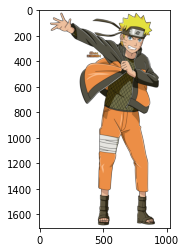

In [ ]:
plt.imshow(img_1)

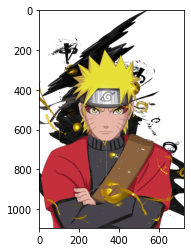

In [ ]:
plt.imshow(img_2)

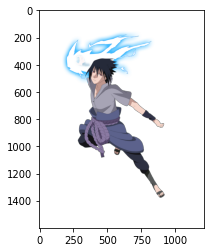

In [ ]:
plt.imshow(img_3)

In [ ]:
img_1.shape, img_2.shape, img_3.shape

((1707, 1024, 4), (1095, 729, 4), (1600, 1214, 4))

## Task 3 : Converting 4 channel images to 3 channel

**Dealing with Concern 4.**  
**This is not necessary if making own CNN because CNN can take any size input but if using transfer learning 3 channels might be required since most of the premade models only accept a 3 channel input**

To look for 4 channel images in the dataset and convert the ones with 4 channels to 3 channel ones
```
# In case of grayScale images the len(img.shape) == 2
if len(img.shape) > 2 and img.shape[2] == 4:
    #convert the image from RGBA2RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
```



In [ ]:
# # In case of grayScale images the len(img.shape) == 2
# if len(img.shape) > 2 and img.shape[2] == 4:
#     #convert the image from RGBA2RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

In [ ]:
 img_1_3c = cv2.cvtColor(img_1, cv2.COLOR_BGRA2BGR)

In [ ]:
img_1_3c.shape

(1707, 1024, 3)

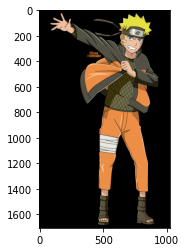

In [ ]:
plt.imshow(img_1_3c)

## Task 4 : Setting up file paths

In [ ]:
dir_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset'

In [ ]:
os.listdir(dir_path)

['Naruto_Uzumaki', 'Sasuke_Uchiha', 'Sakura_Haruno']

In [ ]:
os.listdir(dir_path+'/Sakura_Haruno')[0]

'Sakura_Haruno (56).png'

In [ ]:
sakura_path = dir_path+'/Sakura_Haruno/'

In [ ]:
test_path_sakura = sakura_path+'Sakura_Haruno (56).png'

In [ ]:
test_image_sakura = plt.imread(test_path_sakura)

In [ ]:
test_image_sakura.shape

(660, 440, 4)

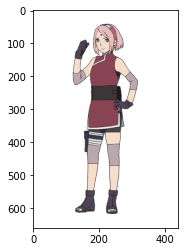

In [ ]:
plt.imshow(test_image_sakura)

## Task 5 : Check the range of image sizes and channels

In [ ]:
# To check the distribution of image sizes
dim_1_sakura = []
dim_2_sakura = []
channels_sakura = []
for image_paths in os.listdir(sakura_path):
  dim_1, dim_2, channels = imread(sakura_path+image_paths).shape
  dim_1_sakura.append(dim_1)
  dim_2_sakura.append(dim_2)
  channels_sakura.append(channels)

In [ ]:
np.mean(dim_1_sakura), np.mean(dim_2_sakura)

(1744.546875, 1006.5625)

In [ ]:
np.std(dim_1_sakura), np.std(dim_2_sakura)

(1068.9039206368057, 573.6107367751671)

In [ ]:
pd.Series(dim_1_sakura).nunique(), pd.Series(dim_2_sakura).nunique(),pd.Series(channels_sakura).nunique()

(55, 49, 1)

In [ ]:
np.min(channels_sakura), np.max(channels_sakura)

(4, 4)

In [ ]:
np.min(dim_1_sakura), np.max(dim_1_sakura)

(512, 5000)

In [ ]:
np.min(dim_2_sakura), np.max(dim_2_sakura)

(349, 2500)

### Inference


*   This shows that there are many different image sizes and they are also distributed over a wide range.
*   This also shows that all the images in the folder have 4 channels and need to be converted to 3 channels.



## Task 6 : Create a label file

> CAUTION : DONOT RUN THIS TASK MULTIPLE TIMES TO AVOID UNWANTED SHUFFLING OF THE DATA LABELS FILE

In [60]:
sakura_path = dir_path+'/Sakura_Haruno_Selected/'

In [61]:
sasuke_path = dir_path+'/Sasuke_Uchiha_Selected/'

In [93]:
naruto_path = dir_path + '/Naruto_Uzumaki_Selected/'

In [76]:
# dataframe that will store image names and labels
df = pd.DataFrame(columns = ['image_name', 'character_label'])

In [77]:
df

,image_name,character_label


In [78]:
# Add Naruto image names and labels to dataframe
i = 0
for image_name in os.listdir(naruto_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Naruto_Uzumaki'
  i+=1

In [79]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [80]:
# Add Sasuke image names and labels to dataframe
print(i)
for image_name in os.listdir(sasuke_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Sasuke_Uchiha'
  i+=1

61


In [81]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [82]:
# Add Sakura image names and labels to dataframe
print(i)
for image_name in os.listdir(sakura_path):
  df.loc[i,'image_name'] = image_name
  df.loc[i, 'character_label'] = 'Sakura_Haruno'
  i+=1

119


In [83]:
df.head()

,image_name,character_label
0,Naruto_Uzumaki (17).png,Naruto_Uzumaki
1,Naruto_Uzumaki (18).png,Naruto_Uzumaki
2,Naruto_Uzumaki (16).png,Naruto_Uzumaki
3,Naruto_Uzumaki (15).png,Naruto_Uzumaki
4,Naruto_Uzumaki (13).png,Naruto_Uzumaki


In [84]:
len(os.listdir(sakura_path))+len(os.listdir(sasuke_path))+len(os.listdir(naruto_path))

176

In [85]:
i

176

In [86]:
# To shuffle the labels in order to avoid any bias
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,image_name,character_label
0,Sasuke_Uchiha (20).png,Sasuke_Uchiha
1,Sakura_Haruno (32).png,Sakura_Haruno
2,Sakura_Haruno (15).png,Sakura_Haruno
3,Sakura_Haruno (28).png,Sakura_Haruno
4,Naruto_Uzumaki (41).png,Naruto_Uzumaki


In [88]:
# CAUTION : THE BELOW LINE HAS BEEN COMMENTED OUT TO PREVENT UNWANTED OVERWRITING OF LABELS FILE
# df.to_csv('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/selected_labels.csv', index = False)

## Task 7 : Image Manipulation

Its usually a good idea to augment the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the `ImageDataGenerator` to do this.

In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [125]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

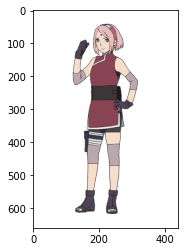

In [126]:
plt.imshow(test_image_sakura)

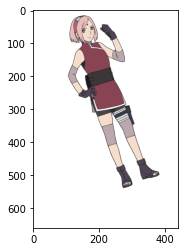

In [127]:
plt.imshow(image_gen.random_transform(test_image_sakura))

## Task 8 : Combining all the work

In [113]:
pilot_train_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_Train/'
pilot_test_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_Test/'
pilot_all_in_one_path = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Pilot_All_in_One/'

In [114]:
# To check the distribution of image sizes
dim_1_all = []
dim_2_all = []
channels_all = []
for image_path in os.listdir(pilot_all_in_one_path):
  dim_1, dim_2, channels = imread(pilot_all_in_one_path+image_path).shape
  dim_1_all.append(dim_1)
  dim_2_all.append(dim_2)
  channels_all.append(channels)
  if(channels == 3):
    print(image_path)

In [115]:
np.mean(dim_1_all), np.mean(dim_2_all)

(1262.9351351351352, 840.5675675675676)

In [116]:
np.std(dim_1_all), np.std(dim_2_all)

(848.6546020793071, 557.1270193635327)

In [117]:
pd.Series(dim_1_all).nunique(), pd.Series(dim_2_all).nunique(),pd.Series(channels_all).nunique()

(141, 126, 1)

In [118]:
np.min(channels_all), np.max(channels_all)

(4, 4)

In [119]:
pd.Series(channels_all).value_counts()

4    185
dtype: int64

In [120]:
np.min(dim_1_all), np.max(dim_1_all)

(300, 5747)

In [121]:
np.min(dim_2_all), np.max(dim_2_all)

(256, 5120)

### Inference


*   This shows that there are many different image sizes and they are also distributed over a wide range hence, need to be resized.
*   There are images with both 3 and 4 channels(3 channel images removed for now) and need to be converted to 3 channels.



In [122]:
image_shape = (1260, 840, 4)